We want to model throws with two dice and visualize the results.

# Requirements

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Implementation

The following function executes `nr_throws` independent throws with two fair dice and returns the sum of the eyes as a numpy array.

In [17]:
def throw_dice(nr_throws):
    return np.random.randint(1, 6 + 1, size=(nr_throws, )) + \
           np.random.randint(1, 6 + 1, size=(nr_throws, ))

We generate data for 1,000 and 100,000 throws.

In [18]:
throws_1_000 = throw_dice(1_000)
throws_100_000 = throw_dice(100_000)

We can now visualize the resulting distribution using Matplotlib's `hist` function.  We explicitely set the bins by specifying the boundaries.  Note that there are 11 bins, since we can throw any number between 2 and 12 inclusive using two dice.

The data is normalized by the `hist` function when we set the argument `density` to `True`.  The subplots share the $y$-axis to make it easier to compare the results.  The ticks on the $x$-axis are set explicitly.

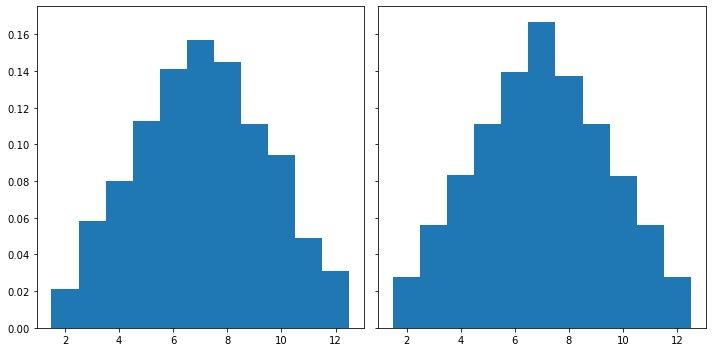

In [35]:
figure, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
bins = np.arange(1.5, 13.0, 1.0)
ticks = np.arange(2.0, 13.0, 2.0)
for i, data in enumerate([throws_1_000, throws_100_000]):
    axes[i].hist(data, bins=bins, density=True)
    axes[i].set_xticks(ticks)
figure.tight_layout()